# 라이브러리 임포트 및 데이터 읽어오기

In [3]:
import pandas as pd
import numpy as np
from dataset import Dataset
from dataread import Dataread
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


ds = Dataset()
dr = Dataread()
JSON_KEY_PATH = "./sprintda05-soomin.json"

In [4]:
master_table = pd.read_csv('./dataset/master_table_v2.csv')
point_table = pd.read_csv('./dataset/use_point_within_signup_N_days.csv')
candidate_table = pd.read_csv('./dataset/candidate_chosen_ratio.csv')

# 테이블 분석하기

In [5]:
def cohort_cut(df):
    over50_cohort = df.loc[df['retention_day8'] >= 0.50]
    under50_cohort = df.loc[df['retention_day8'] < 0.50]
    return over50_cohort, under50_cohort

In [6]:
def cohort_cut_25(df):
    df['cohort_day'] = pd.to_datetime(df['first_vote']).dt.strftime("%m.%d")
    top_25_dates = ["04.30", "05.02", "05.09", "05.10", "05.12", "05.20", "05.21"]
    low_25_dates = ["05.04", "05.05", "05.06", "05.15", "05.16", "05.17", "05.24"]
    
    high_cohort = df.loc[df['cohort_day'].isin(top_25_dates)]
    low_cohort = df.loc[df['cohort_day'].isin(low_25_dates)]

    return high_cohort, low_cohort

In [7]:
def result_print(df, func, integrated = 0):
    if integrated != 0:
        high_cohort, low_cohort = cohort_cut_25(df)
        high_분석 = func(high_cohort)
        low_분석 = func(low_cohort)
        
        print('High-25%')
        display(high_분석)
        print('='*100)
        print('Low-25%')
        display(low_분석)
   
    else:
        over50_cohort, under50_cohort = cohort_cut(df)
        over50_분석 = func(over50_cohort)
        under50_분석 = func(under50_cohort)
        
        print('Over50')
        display(over50_분석)
        print('='*100)
        print('Under50')
        display(under50_분석)
    
    return

## candidate, point 분석

In [8]:
user_table = master_table[['user_id','total_votes','unique_days','retention_day8','gender','school_id','grade']]
user_table = user_table.merge(point_table, on='user_id',how='left')
user_table = user_table.merge(candidate_table, on='user_id', how='left')
user_table

,user_id,total_votes,unique_days,retention_day8,gender,school_id,grade,sign_up_date,first_vote_date,first_point_use_date,first_point_use_amount,vote_sameday_signup,point_used_within_signup_3days,candidate_count,chosen_user_id,chosen_count,ratio
0,838023,22,5,0.515152,F,271.0,1.0,2023-04-19 09:06:00.719792,2023-04-29 16:22:56,2023-04-30 14:27:35,-300.0,0,0,27.0,838023.0,10.0,0.370370
1,838466,127,6,0.569444,F,369.0,2.0,2023-04-19 15:10:56.560337,2023-05-02 22:42:05,2023-05-05 07:32:34,-300.0,0,0,82.0,838466.0,37.0,0.451220
2,838642,1,1,0.515152,F,271.0,2.0,2023-04-20 00:11:00.962160,2023-04-28 14:18:07,2023-04-30 06:49:01,-300.0,0,0,44.0,838642.0,5.0,0.113636
3,839357,205,8,0.515152,M,271.0,1.0,2023-04-20 14:26:20.479856,2023-04-29 16:51:01,2023-04-30 02:19:41,-300.0,0,0,42.0,839357.0,10.0,0.238095
4,840293,170,7,0.422977,F,369.0,1.0,2023-04-21 11:45:56.750174,2023-05-03 02:24:05,2023-05-05 14:49:11,-300.0,0,0,74.0,840293.0,31.0,0.418919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,1510561,9,1,0.451613,M,4426.0,2.0,2023-05-25 14:27:02.976395,2023-05-25 14:28:20,2023-05-26 15:24:26,-200.0,1,1,NaN,NaN,NaN,NaN
4699,1511957,8,1,0.451613,F,5520.0,2.0,2023-05-25 15:45:50.814710,2023-05-25 15:46:25,NaN,NaN,1,0,NaN,NaN,NaN,NaN
4700,1512422,22,1,0.451613,F,4426.0,2.0,2023-05-25 16:52:43.081341,2023-05-25 16:57:53,2023-05-25 17:09:17,-10.0,1,1,NaN,NaN,NaN,NaN
4701,1512542,7,1,0.451613,F,4426.0,2.0,2023-05-25 20:03:38.172395,2023-05-25 22:59:47,2023-05-26 11:28:52,-200.0,1,1,NaN,NaN,NaN,NaN


In [9]:
def candidate_analysis(df):
    result = df.agg({
    'first_point_use_amount': 'mean',
    'vote_sameday_signup': 'mean',
    'candidate_count': 'sum',
    'chosen_count': 'sum',
    'total_votes':'sum',
    'unique_days':'sum',
    'grade':'mean'
})
    result['chosen_ratio'] = result['chosen_count'] / result['candidate_count']
    result['vote_per_day'] = result['total_votes'] / result['unique_days']

    return result.reset_index()

In [10]:
result_print(user_table, candidate_analysis)

Over50


,index,0
0,first_point_use_amount,-272.830084
1,vote_sameday_signup,0.778684
2,candidate_count,99609.000000
3,chosen_count,33720.000000
4,total_votes,457737.000000
5,unique_days,15878.000000
6,grade,1.824905
7,chosen_ratio,0.338524
8,vote_per_day,28.828379


Under50


,index,0
0,first_point_use_amount,-273.762963
1,vote_sameday_signup,0.822626
2,candidate_count,121998.000000
3,chosen_count,41175.000000
4,total_votes,554561.000000
5,unique_days,20280.000000
6,grade,1.890014
7,chosen_ratio,0.337506
8,vote_per_day,27.345217


#### 해석
- point_use_amount -300 << 첫 포인트가 투표 선택된 것에 사용한 서비스
- point_use_amount -200 << 사용처를 알 수 없음. 선택받은 적 없는 사람도 사용 가능한 포인트 서비스
- 따라서 -300에 가까울수록 투표 관련하여 포인트를 사용했다고 볼 수 있다. 그러나 유의미한 차이가 없음.
    

- vote_sameday_signup << 가입 첫 날 바로 활성화된 비율. 77% vs 82% 인 상황. 약간의 차이가 있기는 하지만 유의미한 차이라고 보이진 않음.


- ratio << 후보 등장 대비 선택받은 비율. 두 집단 모두 33% 로 사실상 무차별한 것으로 보임.

## VOTE POINT within after N days

In [11]:
import warnings
# SettingWithCopyWarning 무시
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [12]:
user_table = master_table[['user_id','total_votes','unique_days','retention_day8','gender','school_id','grade']]
user_table = user_table.merge(point_table, on='user_id',how='left')
user_table = user_table.merge(candidate_table, on='user_id', how='left')
user_table

,user_id,total_votes,unique_days,retention_day8,gender,school_id,grade,sign_up_date,first_vote_date,first_point_use_date,first_point_use_amount,vote_sameday_signup,point_used_within_signup_3days,candidate_count,chosen_user_id,chosen_count,ratio
0,838023,22,5,0.515152,F,271.0,1.0,2023-04-19 09:06:00.719792,2023-04-29 16:22:56,2023-04-30 14:27:35,-300.0,0,0,27.0,838023.0,10.0,0.370370
1,838466,127,6,0.569444,F,369.0,2.0,2023-04-19 15:10:56.560337,2023-05-02 22:42:05,2023-05-05 07:32:34,-300.0,0,0,82.0,838466.0,37.0,0.451220
2,838642,1,1,0.515152,F,271.0,2.0,2023-04-20 00:11:00.962160,2023-04-28 14:18:07,2023-04-30 06:49:01,-300.0,0,0,44.0,838642.0,5.0,0.113636
3,839357,205,8,0.515152,M,271.0,1.0,2023-04-20 14:26:20.479856,2023-04-29 16:51:01,2023-04-30 02:19:41,-300.0,0,0,42.0,839357.0,10.0,0.238095
4,840293,170,7,0.422977,F,369.0,1.0,2023-04-21 11:45:56.750174,2023-05-03 02:24:05,2023-05-05 14:49:11,-300.0,0,0,74.0,840293.0,31.0,0.418919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,1510561,9,1,0.451613,M,4426.0,2.0,2023-05-25 14:27:02.976395,2023-05-25 14:28:20,2023-05-26 15:24:26,-200.0,1,1,NaN,NaN,NaN,NaN
4699,1511957,8,1,0.451613,F,5520.0,2.0,2023-05-25 15:45:50.814710,2023-05-25 15:46:25,NaN,NaN,1,0,NaN,NaN,NaN,NaN
4700,1512422,22,1,0.451613,F,4426.0,2.0,2023-05-25 16:52:43.081341,2023-05-25 16:57:53,2023-05-25 17:09:17,-10.0,1,1,NaN,NaN,NaN,NaN
4701,1512542,7,1,0.451613,F,4426.0,2.0,2023-05-25 20:03:38.172395,2023-05-25 22:59:47,2023-05-26 11:28:52,-200.0,1,1,NaN,NaN,NaN,NaN


### VOTE

In [13]:
date_user_table = user_table[['user_id','retention_day8','sign_up_date','first_vote_date','first_point_use_date']]
date_user_table['sign_up_date'] = pd.to_datetime(date_user_table['sign_up_date'])
date_user_table['first_vote_date'] = pd.to_datetime(date_user_table['first_vote_date'])
date_user_table['first_point_use_date'] = pd.to_datetime(date_user_table['first_point_use_date'])

In [14]:
# 조건 컬럼
date_user_table['days_to_vote'] = (date_user_table['first_vote_date'] - date_user_table['sign_up_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 7):
    date_user_table[f'vote_within_{i}days'] = (date_user_table['days_to_vote'] <= i).astype(int)

# 7일 초과 투표
date_user_table['vote_over_7days'] = (date_user_table['days_to_vote'] > 7).astype(int)

In [15]:
def within_days_analysis(df):
    df = df.drop(columns=['user_id','retention_day8','sign_up_date','first_vote_date','first_point_use_date'])
    result = df.mean()
    return result.reset_index()

In [16]:
result_print(date_user_table, within_days_analysis)

Over50


,index,0
0,days_to_vote,0.542142
1,vote_within_1days,0.899946
2,vote_within_2days,0.929853
3,vote_within_3days,0.942904
4,vote_within_4days,0.960848
5,vote_within_5days,0.964111
6,vote_within_6days,0.977162
7,vote_over_7days,0.019032


Under50


,index,0
0,days_to_vote,0.272696
1,vote_within_1days,0.952514
2,vote_within_2days,0.969623
3,vote_within_3days,0.979050
4,vote_within_4days,0.984986
5,vote_within_5days,0.988128
6,vote_within_6days,0.990223
7,vote_over_7days,0.008380


#### 해석
- 전반적으로 under50 이 가입대비 더 이른시점에 투표를 진행하는 것으로 보인다.
- 이렇게 된 이후는, signup day 가 4.19일 등의 시점이지만, 실제 투표가 기록되는 날짜는 4.28일 이후임에 따라서    
4.28~5.1에 해당하는 초반부 코호트가 over50 코호트로 잡히면서 발생한 문제가 아닐까 싶다.

- 가장 대표적으로 확인할 수 있는게, 첫 투표까지 걸린 기간이 0.54일인데 비해, under50 코호트에서 0.27일로 4명중 3명은 회원 가입 당일에 바로 투표 서비스를 이용했다 처럼 보이는 것.

### POINT

In [17]:
## 포인트 기록

date_user_table = user_table[['user_id','retention_day8','sign_up_date','first_vote_date','first_point_use_date']]
date_user_table['sign_up_date'] = pd.to_datetime(date_user_table['sign_up_date'])
date_user_table['first_point_use_date'] = pd.to_datetime(date_user_table['first_point_use_date'])

# 조건 컬럼
date_user_table['days_to_point'] = (date_user_table['first_point_use_date'] - date_user_table['sign_up_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 7):
    date_user_table[f'point_within_{i}days'] = (date_user_table['days_to_point'] <= i).astype(int)

# 7일 초과 투표
date_user_table['point_over_7days'] = (date_user_table['days_to_point'] > 7).astype(int)

result_print(date_user_table, within_days_analysis)

Over50


,index,0
0,days_to_point,1.335933
1,point_within_1days,0.793910
2,point_within_2days,0.846112
3,point_within_3days,0.874932
4,point_within_4days,0.895595
5,point_within_5days,0.909190
6,point_within_6days,0.928222
7,point_over_7days,0.037520


Under50


,index,0
0,days_to_point,1.064444
1,point_within_1days,0.800279
2,point_within_2days,0.854749
3,point_within_3days,0.879190
4,point_within_4days,0.895251
5,point_within_5days,0.905377
6,point_within_6days,0.913408
7,point_over_7days,0.027584


#### 해석
- SIGNUP DATE 가 기준이 되었기 때문에, 역시나 POINT 사용 역시 OVER50 코호트에서 평균적으로 좀 더 지연된 경향이 있다.

### POINT USE AFTER VOTE

In [18]:
## VOTE 대비 POINT TIME
date_user_table = user_table[['user_id','retention_day8','sign_up_date','first_vote_date','first_point_use_date']]
date_user_table['first_vote_date'] = pd.to_datetime(date_user_table['first_vote_date'])
date_user_table['first_point_use_date'] = pd.to_datetime(date_user_table['first_point_use_date'])

# 조건 컬럼
date_user_table['days_to_point_after_vote'] = (date_user_table['first_point_use_date'] - date_user_table['first_vote_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 7):
    date_user_table[f'point_within_{i}vote_days'] = (date_user_table['days_to_point_after_vote'] <= i).astype(int)

# 7일 초과 투표
date_user_table['point_over_7vote_days'] = (date_user_table['days_to_point_after_vote'] > 7).astype(int)

result_print(date_user_table, within_days_analysis)

Over50


,index,0
0,days_to_point_after_vote,0.657939
1,point_within_1vote_days,0.878738
2,point_within_2vote_days,0.912996
3,point_within_3vote_days,0.934747
4,point_within_4vote_days,0.944535
5,point_within_5vote_days,0.952692
6,point_within_6vote_days,0.955954
7,point_over_7vote_days,0.016313


Under50


,index,0
0,days_to_point_after_vote,0.674444
1,point_within_1vote_days,0.849860
2,point_within_2vote_days,0.888268
3,point_within_3vote_days,0.900838
4,point_within_4vote_days,0.913059
5,point_within_5vote_days,0.918296
6,point_within_6vote_days,0.921439
7,point_over_7vote_days,0.020251


#### 해석
- SIGNUP이 문제라면, VOTE 대비로 봐보면 다를까?
    - 이전 결과와 달리, 평균 0.66일로 두 코호트간 차이가 거의 없는것으로 나타난다.
    - 다만 세부적으로, Over50 그룹이 조금 더 투표날 대비 포인트 사용날이 더 빠른것으로 추정된다.

## 유저가 처음 투표한 시간, 선호하는 시간

### 처음 투표한 시간

In [19]:
user_table = master_table[['user_id','retention_day8']].copy()
user_table = user_table.merge(point_table[['user_id','first_vote_date']], on='user_id',how='left')
user_table['first_vote_hour'] = pd.to_datetime(user_table['first_vote_date']).dt.hour
user_table

,user_id,retention_day8,first_vote_date,first_vote_hour
0,838023,0.515152,2023-04-29 16:22:56,16
1,838466,0.569444,2023-05-02 22:42:05,22
2,838642,0.515152,2023-04-28 14:18:07,14
3,839357,0.515152,2023-04-29 16:51:01,16
4,840293,0.422977,2023-05-03 02:24:05,2
...,...,...,...,...
4698,1510561,0.451613,2023-05-25 14:28:20,14
4699,1511957,0.451613,2023-05-25 15:46:25,15
4700,1512422,0.451613,2023-05-25 16:57:53,16
4701,1512542,0.451613,2023-05-25 22:59:47,22


## 첫 날 투표건수

In [20]:
user_table = master_table[['user_id','retention_day8']].copy()
user_table = user_table.merge(point_table.drop(columns=['first_point_use_amount','point_used_within_signup_3days']), on='user_id',how='left')
user_table

,user_id,retention_day8,sign_up_date,first_vote_date,first_point_use_date,vote_sameday_signup
0,838023,0.515152,2023-04-19 09:06:00.719792,2023-04-29 16:22:56,2023-04-30 14:27:35,0
1,838466,0.569444,2023-04-19 15:10:56.560337,2023-05-02 22:42:05,2023-05-05 07:32:34,0
2,838642,0.515152,2023-04-20 00:11:00.962160,2023-04-28 14:18:07,2023-04-30 06:49:01,0
3,839357,0.515152,2023-04-20 14:26:20.479856,2023-04-29 16:51:01,2023-04-30 02:19:41,0
4,840293,0.422977,2023-04-21 11:45:56.750174,2023-05-03 02:24:05,2023-05-05 14:49:11,0
...,...,...,...,...,...,...
4698,1510561,0.451613,2023-05-25 14:27:02.976395,2023-05-25 14:28:20,2023-05-26 15:24:26,1
4699,1511957,0.451613,2023-05-25 15:45:50.814710,2023-05-25 15:46:25,NaN,1
4700,1512422,0.451613,2023-05-25 16:52:43.081341,2023-05-25 16:57:53,2023-05-25 17:09:17,1
4701,1512542,0.451613,2023-05-25 20:03:38.172395,2023-05-25 22:59:47,2023-05-26 11:28:52,1


### 투표한 첫 날 투표 건수

In [21]:
qusetion_table = ds.votes.accounts_userquestionrecord()[['user_id','created_at','id']]
qusetion_table['day'] = pd.to_datetime(qusetion_table['created_at']).dt.floor("d")
qusetion_table = qusetion_table.drop(columns=['created_at'])

user_table['day'] = pd.to_datetime(user_table['first_vote_date']).dt.floor('d')

In [22]:
merged_table =pd.merge(
    user_table[['user_id','retention_day8','day']],
    qusetion_table,
    on = ['user_id','day'],
    how = 'left'
)

merged_table['question_count'] = (
    merged_table
    .groupby(['user_id', 'day'])['user_id']
    .transform('count')
)

merged_table = (
    merged_table
    .drop_duplicates(subset='user_id')
    .drop(columns=['id'])
)
merged_table

,user_id,retention_day8,day,question_count
0,838023,0.515152,2023-04-29,1
1,838466,0.569444,2023-05-02,9
10,838642,0.515152,2023-04-28,9
19,839357,0.515152,2023-04-29,1
20,840293,0.422977,2023-05-03,52
...,...,...,...,...
137084,1510561,0.451613,2023-05-25,9
137093,1511957,0.451613,2023-05-25,8
137101,1512422,0.451613,2023-05-25,22
137123,1512542,0.451613,2023-05-25,7


In [23]:
def first_voteday_anaylsis(df):
    df = df.drop(columns=['user_id','retention_day8','day'])
    result = df.mean()
    return result.reset_index()

In [24]:
result_print(merged_table, first_voteday_anaylsis)

Over50


,index,0
0,question_count,27.392061


Under50


,index,0
0,question_count,30.294344


### 가입한 첫 날 투표 건수

In [25]:
user_table = master_table[['user_id','retention_day8']].copy()
user_table = user_table.merge(point_table.drop(columns=['first_point_use_amount','point_used_within_signup_3days']), on='user_id',how='left')
# user_table = user_table.loc[user_table['vote_sameday_signup'] == 1]

qusetion_table = ds.votes.accounts_userquestionrecord()[['user_id','created_at','id']]
qusetion_table['day'] = pd.to_datetime(qusetion_table['created_at']).dt.floor("d")
qusetion_table = qusetion_table.drop(columns=['created_at'])

user_table['day'] = pd.to_datetime(user_table['sign_up_date']).dt.floor('d')


merged_table =pd.merge(
    user_table[['user_id','retention_day8','day']],
    qusetion_table,
    on = ['user_id','day'],
    how = 'left'
)

merged_table['question_count'] = (
    merged_table
    .groupby(['user_id', 'day'])['user_id']
    .transform('count')
)

merged_table = (
    merged_table
    .drop_duplicates(subset='user_id')
    .drop(columns=['id'])
)
display(merged_table)

result_print(merged_table, first_voteday_anaylsis)

,user_id,retention_day8,day,question_count
0,838023,0.515152,2023-04-19,1
1,838466,0.569444,2023-04-19,1
2,838642,0.515152,2023-04-20,1
3,839357,0.515152,2023-04-20,1
4,840293,0.422977,2023-04-21,1
...,...,...,...,...
111811,1510561,0.451613,2023-05-25,9
111820,1511957,0.451613,2023-05-25,8
111828,1512422,0.451613,2023-05-25,22
111850,1512542,0.451613,2023-05-25,7


Over50


,index,0
0,question_count,21.323002


Under50


,index,0
0,question_count,25.366969


## 첫 날 열람 건수

In [26]:
def has_read_anaylsis(df):
    df = df.drop(columns=['user_id','retention_day8'])

    result = {
        'total_voted_mean' : df['total_voted'].mean().round(3),
        'total_voted_sum' : df['total_voted'].sum(),
        'total_read_mean' : df['total_read'].mean().round(3),
        'total_read_sum' : df['total_read'].sum(),
        'read_per_vote' : round((df['total_read'].sum() / df['total_voted'].sum()),3)
    }
    return result

In [27]:
record = ds.votes.accounts_userquestionrecord()
has_read_table = record[['chosen_user_id','has_read','id']].copy()

user_table = master_table[['user_id','retention_day8']].copy()

In [28]:
has_read_table['total_voted'] =  (
    has_read_table
    .groupby(['chosen_user_id'])['id']
    .transform('count')
)
has_read_table['total_read'] = (
    has_read_table
    .groupby(['chosen_user_id'])['has_read']
    .transform('sum')
)
has_read_table = has_read_table[['chosen_user_id','total_voted','total_read']].rename(columns={'chosen_user_id':'user_id'}).drop_duplicates(subset='user_id')

In [29]:
user_table = user_table.merge(
    has_read_table,
    on='user_id',
    how='left'
)

user_table

,user_id,retention_day8,total_voted,total_read
0,838023,0.515152,262.0,0.0
1,838466,0.569444,343.0,19.0
2,838642,0.515152,40.0,10.0
3,839357,0.515152,173.0,15.0
4,840293,0.422977,241.0,39.0
...,...,...,...,...
4698,1510561,0.451613,37.0,37.0
4699,1511957,0.451613,149.0,133.0
4700,1512422,0.451613,51.0,51.0
4701,1512542,0.451613,87.0,86.0


In [30]:
result_print(user_table, has_read_anaylsis)

Over50


{'total_voted_mean': 264.298,
 'total_voted_sum': 485780.0,
 'total_read_mean': 147.486,
 'total_read_sum': 271079.0,
 'read_per_vote': 0.558}

Under50


{'total_voted_mean': 192.009,
 'total_voted_sum': 548185.0,
 'total_read_mean': 108.68,
 'total_read_sum': 310280.0,
 'read_per_vote': 0.566}

# 테이블 완성하기

In [31]:
def table_merging(master_table, merge_table):
    result = master_table.merge(
    merge_table,
    on = 'user_id',
    how='left'
).copy()
    return result

In [32]:
import warnings
# SettingWithCopyWarning 무시
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [33]:
# 가입 후 7일 이내 결제 유무
date_user_table = point_table[['user_id','sign_up_date','first_vote_date','first_point_use_date','first_point_use_amount','vote_sameday_signup']]
date_user_table['sign_up_date'] = pd.to_datetime(date_user_table['sign_up_date'])
date_user_table['first_vote_date'] = pd.to_datetime(date_user_table['first_vote_date'])
date_user_table['first_point_use_date'] = pd.to_datetime(date_user_table['first_point_use_date'])

# 조건 컬럼
date_user_table['days_to_vote'] = (date_user_table['first_vote_date'] - date_user_table['sign_up_date']).dt.days
# 조건 컬럼
date_user_table['days_to_point'] = (date_user_table['first_point_use_date'] - date_user_table['sign_up_date']).dt.days
# 조건 컬럼
date_user_table['days_to_point_after_vote'] = (date_user_table['first_point_use_date'] - date_user_table['first_vote_date']).dt.days

final_master_table = table_merging(master_table, date_user_table)

In [34]:
# 투표 등장 대비 선택받은 비율
final_master_table = table_merging(final_master_table, candidate_table.drop(columns='chosen_user_id'))

In [35]:
# 처음 투표한 시간
user_table = master_table[['user_id']].copy()
user_table = user_table.merge(point_table[['user_id','first_vote_date']], on='user_id',how='left')
user_table['first_vote_hour'] = pd.to_datetime(user_table['first_vote_date']).dt.hour

final_master_table = table_merging(final_master_table, user_table[['user_id','first_vote_hour']])
final_master_table

,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,ret_group,ret_group_over,...,first_point_use_date,first_point_use_amount,vote_sameday_signup,days_to_vote,days_to_point,days_to_point_after_vote,candidate_count,chosen_count,ratio,first_vote_hour
0,838023,22,5,2023-04-29,2023-05-04,5,2023-04-29,0.515152,50 이상,50 이상,...,2023-04-30 14:27:35,-300.0,0,10,11.0,0.0,27.0,10.0,0.370370,16
1,838466,127,6,2023-05-02,2023-05-07,5,2023-05-02,0.569444,50 이상,50 이상,...,2023-05-05 07:32:34,-300.0,0,13,15.0,2.0,82.0,37.0,0.451220,22
2,838642,1,1,2023-04-29,2023-04-29,0,2023-04-29,0.515152,50 이상,50 이상,...,2023-04-30 06:49:01,-300.0,0,8,10.0,1.0,44.0,5.0,0.113636,14
3,839357,205,8,2023-04-29,2023-05-07,8,2023-04-29,0.515152,50 이상,50 이상,...,2023-04-30 02:19:41,-300.0,0,9,9.0,0.0,42.0,10.0,0.238095,16
4,840293,170,7,2023-05-03,2023-05-15,12,2023-05-03,0.422977,50 미만,NaN,...,2023-05-05 14:49:11,-300.0,0,11,14.0,2.0,74.0,31.0,0.418919,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,1510561,9,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,NaN,...,2023-05-26 15:24:26,-200.0,1,0,1.0,1.0,NaN,NaN,NaN,14
4699,1511957,8,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,NaN,...,NaT,NaN,1,0,NaN,NaN,NaN,NaN,NaN,15
4700,1512422,22,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,NaN,...,2023-05-25 17:09:17,-10.0,1,0,0.0,0.0,NaN,NaN,NaN,16
4701,1512542,7,1,2023-05-25,2023-05-25,0,2023-05-25,0.451613,50 미만,NaN,...,2023-05-26 11:28:52,-200.0,1,0,0.0,0.0,NaN,NaN,NaN,22


# 랜포
y 종속변수 : retention_day8    
x 독립변수 : 나머지 파생

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [37]:
import pandas as pd

master_table = pd.read_csv('./integrated_master_table.csv')
master_table = master_table.drop(columns=['ret_group','ret_group_over','ret_group_under'])
master_table = master_table.rename(columns={'ratio':'chosen_ratio'})

In [38]:
master_table.columns

Index(['user_id', 'total_votes', 'unique_days', 'first_vote', 'last_vote',
       'active_days', 'cohort_day', 'retention_day8', 'gender', 'group_id',
       'school_id', 'grade', 'votes_within_3d_count', 'reported_user_count',
       'vote_nunique_user_count', 'period_friend_count', 'sign_up_date',
       'first_vote_date', 'first_point_use_date', 'first_point_use_amount',
       'vote_sameday_signup', 'days_to_vote', 'days_to_point',
       'days_to_point_after_vote', 'first_vote_hour',
       'first_voteday_question_count', 'total_voted', 'total_read',
       'opposite_sex_votes_received_count', 'opposite_sex_vote_received_ratio',
       'candidate_count', 'chosen_count', 'chosen_ratio', 'address',
       'student_count', 'school_type', 'firstquestion_id',
       'first_question_text', 'first_question_category'],
      dtype='object')

In [39]:
regressor_table = master_table.copy()
gender_dic = {'M':0, 'F':1}
school_dic = {'M':1, 'H':2}
regressor_table['gender'] = regressor_table['gender'].map(gender_dic)
regressor_table['school_type'] = regressor_table['school_type'].map(school_dic)

## VOTE 대비 POINT TIME
regressor_table['sign_up_date'] = pd.to_datetime(regressor_table['sign_up_date'])
regressor_table['first_vote_date'] = pd.to_datetime(regressor_table['first_vote_date'])
regressor_table['first_point_use_date'] = pd.to_datetime(regressor_table['first_point_use_date'])

# 조건 컬럼
regressor_table['days_to_point_after_vote'] = (regressor_table['first_point_use_date'] - regressor_table['first_vote_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 1):
    regressor_table[f'point_within_{i}vote_days'] = (regressor_table['days_to_point_after_vote'] <= i).astype(int)

# 7일 초과 투표
regressor_table['point_over_7vote_days'] = (regressor_table['days_to_point_after_vote'] > 7).astype(int)

# 조건 컬럼
regressor_table['days_to_point'] = (regressor_table['first_point_use_date'] - regressor_table['sign_up_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 1):
    regressor_table[f'point_within_{i}days'] = (regressor_table['days_to_point'] <= i).astype(int)

# 7일 초과 투표
regressor_table['point_over_7days'] = (regressor_table['days_to_point'] > 7).astype(int)

# 조건 컬럼
regressor_table['days_to_vote'] = (regressor_table['first_vote_date'] - regressor_table['sign_up_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 1):
    regressor_table[f'vote_within_{i}days'] = (regressor_table['days_to_vote'] <= i).astype(int)

# 7일 초과 투표
regressor_table['vote_over_7days'] = (regressor_table['days_to_vote'] > 7).astype(int)

# nan 값 및 독립변수로 쓸 수 없는 컬럼 제거
regressor_table = regressor_table.drop(columns=[
    'user_id','sign_up_date','first_vote_date','first_point_use_date',
    'address','first_question_text','first_question_category',
    'first_vote','last_vote','cohort_day']
    ).fillna(0)


In [40]:
exclude_list = ['point_over_7vote_days','point_over_7days','vote_over_7days','reported_user_count','gender','opposite_sex_votes_received_count','candidate_count','active_days','total_voted']
regressor_table2 = regressor_table.drop(columns=exclude_list).copy()

In [41]:
y = regressor_table2['retention_day8']
X = regressor_table2.drop(columns=['retention_day8'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(r2_score(y_test,y_pred))

print("Feature Importances:", rf.feature_importances_)

0.5943610077950847
Feature Importances: [0.0229065  0.08141341 0.06105973 0.10686362 0.03008476 0.03120209
 0.02503955 0.04322549 0.01292845 0.00713147 0.02147771 0.0110378
 0.01022157 0.07001863 0.02321996 0.03698424 0.03206667 0.08317569
 0.03205015 0.11913791 0.08790814 0.05084645]


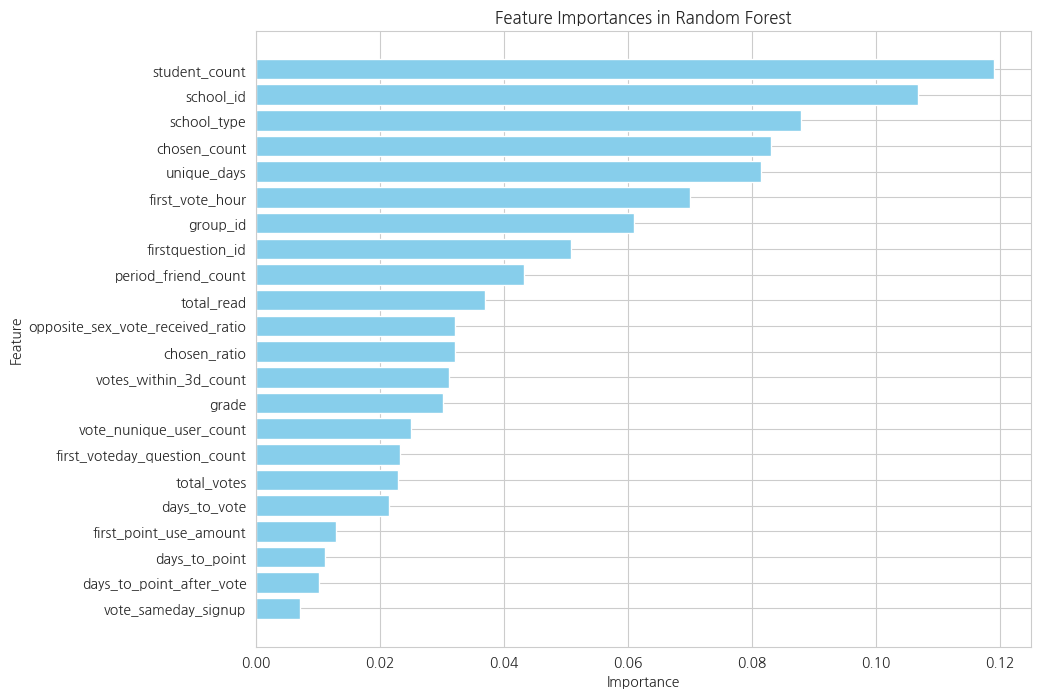

In [42]:
import matplotlib.pyplot as plt
col_importance = pd.DataFrame({
    'Feature': X.columns,  
    'Importance': rf.feature_importances_
})

# 중요도가 높은 순으로 정렬
col_importance = col_importance.sort_values(by="Importance", ascending=False).reset_index(drop=True)

# 시각화
plt.figure(figsize=(10, 8))
plt.barh(col_importance['Feature'], col_importance['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Random Forest")
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬
plt.show()

## 해석
- 지금까지의 변수들로 유의미한 정보는 파악하기 어렵지만, school_id의 관여율이 높은걸로 봐서 특정 학교의 retention이 높을 수 있다는 생각을 해보아야 할 지도

# 마스터 테이블 분석하기

In [43]:
def integrated_anaylsis(df):
    result = df.agg({
    'total_votes': 'mean',
    'unique_days': 'mean',
    'active_days': 'mean',
    'gender': 'mean',
    'unique_days':'mean',
    'grade':'mean',
    'votes_within_3d_count':'mean',
    'reported_user_count':'mean',
    'vote_nunique_user_count':'mean',
    'period_friend_count':'mean',
    'first_point_use_amount':'mean',
    'vote_sameday_signup':'mean',
    'days_to_vote':'mean',
    'days_to_point':'mean',
    'days_to_point_after_vote':'mean',
    'first_voteday_question_count':'mean',
    'total_voted':'mean',
    'total_read':'mean',
    'opposite_sex_votes_received_count':'mean',
    'opposite_sex_vote_received_ratio':'mean',
    'candidate_count':'mean',
    'chosen_count':'mean',
    'ratio':'mean',
    'student_count':'mean',
    'school_type':'mean',
})
    return result.reset_index()

In [44]:
master_table = pd.read_csv('./integrated_master_table.csv')

In [45]:
master_table.school_type.unique()

array(['H', 'M'], dtype=object)

In [46]:
drop_col = [
    'user_id','sign_up_date','first_vote_date','first_point_use_date',
    'address','first_question_text','first_question_category',
    'last_vote','ret_group','ret_group_over','ret_group_under'
    ]

In [47]:
user_table = master_table.drop(columns=drop_col).copy()

gender_dic = {'M':0, 'F':1}
school_dic = {'M':1, 'H':2}
user_table['gender'] = user_table['gender'].map(gender_dic)
user_table['school_type'] = user_table['school_type'].map(school_dic)

In [48]:
result_print(user_table, integrated_anaylsis, 1)

High-25%


,index,0
0,total_votes,243.984836
1,unique_days,8.452514
2,active_days,9.509178
3,gender,0.551476
4,grade,1.825219
5,votes_within_3d_count,107.517159
6,reported_user_count,0.031923
7,vote_nunique_user_count,35.512370
8,period_friend_count,45.509178
9,first_point_use_amount,-261.631148


Low-25%


,index,0
0,total_votes,185.077974
1,unique_days,6.918006
2,active_days,8.422026
3,gender,0.513666
4,grade,1.921222
5,votes_within_3d_count,106.104502
6,reported_user_count,0.053055
7,vote_nunique_user_count,32.532958
8,period_friend_count,41.172026
9,first_point_use_amount,-285.705628


# T-Test 설계하기

In [49]:
from statsmodels.stats.power import TTestIndPower
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

## 데이터 매니징

In [50]:
master_table = pd.read_csv('./integrated_master_table.csv')

drop_col = [
    'user_id','sign_up_date','first_vote_date','first_point_use_date',
    'address','first_question_text','first_question_category',
    'last_vote','ret_group','ret_group_over','ret_group_under'
    ]

user_table = master_table.drop(columns=drop_col).copy()

gender_dic = {'M':0, 'F':1}
school_dic = {'M':1, 'H':2}
user_table['gender'] = user_table['gender'].map(gender_dic)
user_table['school_type'] = user_table['school_type'].map(school_dic)

user_table['days_to_point'].fillna(99, inplace=True)
user_table['days_to_point_after_vote'].fillna(99, inplace=True)
user_table.fillna(0, inplace=True)

In [51]:
high_cohort, low_cohort = cohort_cut_25(user_table)
high_cohort = high_cohort.drop(columns=['first_vote','cohort_day','retention_day8'])
low_cohort = low_cohort.drop(columns=['first_vote','cohort_day','retention_day8'])

## 샘플 사이즈 검정 (with power) 함수

In [52]:
def cohen_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

In [53]:
def cal_samplesize(x,y):
    power_analysis = TTestIndPower()
    alpha = 0.05
    power = 0.8

    sample_size = power_analysis.solve_power(effect_size=cohen_d(x, y), alpha=alpha, power=power, alternative='two-sided')
    
    # print(f'''
    # alpha : {alpha}
    # power : {power}
    # 필요한 샘플 크기 (그룹당): {sample_size:.0f}
    # ''')
    
    # int로 변환, 올림처리로 예외 반영
    return int(np.ceil(sample_size)) 

## 정규성검정, 등분산검정, TTest 함수

In [54]:
def Normality_test(x,y):
    p1 = shapiro(x).pvalue
    p2 = shapiro(y).pvalue

    return ((p1 > 0.05) and (p2 > 0.05))

In [55]:
def Equal_var_test(x,y,normal):
    # 정규성을 만족하지 않으면, 등분산 검정을 진행하지 않음.
    
    if normal == True:
        p_var = levene(x,y).pvalue
        return (p_var > 0.05)
    
    return False
    

In [56]:
def T_Test(x,y,normal, equal_var):
    # 정규성, 등분산의 결과에 따라 수행하는 T-test 방법을 달리하고 방법을 기록
    
    if normal == True:
        t_stat, p_val = ttest_ind(x, y, equal_var=equal_var)
        test_used = 'T-test (equal_var)' if equal_var else "Welch T-Test"
    else:
        t_stat, p_val = mannwhitneyu(x,y, alternative='two-sided')
        test_used = 'Mann-Whitney U'
    
    return t_stat, p_val, test_used

In [57]:
def result_saving(result, col, sample_size, normal, equal_var, test_used, t_stat, p_val):
    result.append({
        'column':col,
        'sample_size':sample_size,
        'normality':normal,
        'equal_var':equal_var,
        'test':test_used,
        'statistic':t_stat,
        'p_value':p_val,
        'significant':p_val < 0.05
    })
    return result

In [70]:
def Statistic_test(result, x, y, random_state=42):
    # 컬럼명 기록
    col = x.name
    
    # 계산된 sample_size가 len보다 길 경우를 상정하고 예외
    sample_size = min(cal_samplesize(x,y), len(x), len(y)) 

    # 계산한 sample_size에 맞게, 각각의 x, y에서 샘플 추출
    x_sample = x.sample(n=sample_size, random_state=random_state)
    y_sample = y.sample(n=sample_size, random_state=random_state)

    # 정규성, 등분산성 검정 후 해당 결과를 바탕으로 T-test 진행
    normal = Normality_test(x_sample,y_sample)
    equal_var = Equal_var_test(x_sample,y_sample,normal)
    t_stat, p_val, test_used = T_Test(x_sample,y_sample,normal,equal_var)
    
    # 결과 저장
    result = result_saving(result, col, sample_size, normal, equal_var, test_used, t_stat, p_val)

    return result

## T-Test 수행

In [72]:
result = []

for col in high_cohort:
    result = Statistic_test(result, high_cohort[col], low_cohort[col])
    

## 결과

In [73]:
result_df = pd.DataFrame(result)
result_df

,column,sample_size,normality,equal_var,test,statistic,p_value,significant
0,total_votes,147,False,False,Mann-Whitney U,12690.0,9.701036e-03,True
1,unique_days,113,False,False,Mann-Whitney U,6706.5,5.112033e-01,False
2,active_days,419,False,False,Mann-Whitney U,95389.5,2.956599e-02,True
3,gender,1244,False,False,Mann-Whitney U,803624.0,5.380544e-02,False
4,group_id,157,False,False,Mann-Whitney U,15162.5,4.193218e-04,True
5,school_id,29,False,False,Mann-Whitney U,537.5,6.841882e-02,False
6,grade,1014,False,False,Mann-Whitney U,482354.5,1.012618e-02,True
7,votes_within_3d_count,1244,False,False,Mann-Whitney U,782439.5,6.283958e-01,False
8,reported_user_count,1244,False,False,Mann-Whitney U,769380.0,3.183911e-01,False
9,vote_nunique_user_count,652,False,False,Mann-Whitney U,238154.5,1.658775e-04,True


In [71]:
sig_counts = {col: 0 for col in result_df['column']}

for random_state in range(1, 43):
    temp_result = []
    for col in high_cohort.columns:
        temp_result = Statistic_test(temp_result, high_cohort[col], low_cohort[col], random_state)
    temp_df = pd.DataFrame(temp_result)
    for idx, row in temp_df.iterrows():
        if row['significant']:
            sig_counts[row['column']] += 1

sig_counts_df = pd.DataFrame(list(sig_counts.items()), columns=['column', 'significant_count'])
sig_counts_df = sig_counts_df.sort_values(by='significant_count', ascending=False).reset_index(drop=True)
sig_counts_df

/home/project4_machine/project4/google_cloud/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


,column,significant_count
0,first_point_use_amount,42
1,first_voteday_question_count,42
2,vote_nunique_user_count,41
3,group_id,41
4,grade,41
5,candidate_count,40
6,period_friend_count,40
7,total_votes,40
8,chosen_count,40
9,active_days,39
